# Лабораторная работа №3
# Выполнил: Васильекв Григорий.
# Группа: ББМО-02-23

## 1. Установка и проверка доступных GPU:

В этом блоке производится установка библиотеки tf-keras-vis, затем проверяется, сколько GPU доступно для работы с TensorFlow.

In [3]:
!pip install tf-keras-vis
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus
_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))


Tensorflow recognized 1 GPUs


## 2. Загрузка и подготовка модели VGG16:

В этом блоке загружается предобученная модель VGG16 с ImageNet и выводится ее сводка.

VGG16 — это архитектура сверточной нейронной сети (CNN), разработанная группой исследователей из Оксфордского университета в рамках работы над проектом Visual Geometry Group (VGG).

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model # Импортируем модель VGG16 из библиотеки Keras с предобученными весами на ImageNet.

model = Model(weights='imagenet', include_top=True) # Загружаем модель VGG16 с предобученными весами на наборе данных ImageNet и включаем последний слой (для классификации).
model.summary()


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Загрузка изображений:

Здесь загружаются 4 изображения (кот, лиса, кролик и собака) и они конвертируются в массивы numpy. Эти изображения будут использоваться для дальнейшего анализа.

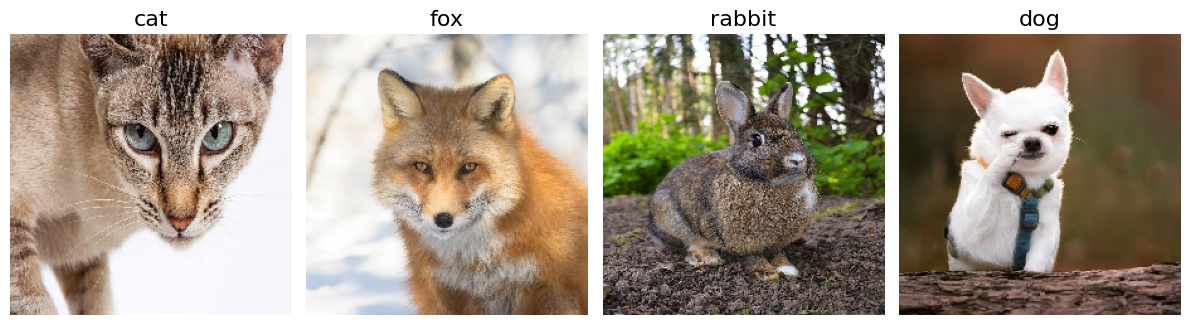

In [5]:
from tensorflow.keras.preprocessing.image import load_img  # Импортируем функцию для загрузки изображения из файла.
from tensorflow.keras.applications.vgg16 import preprocess_input  # Импортируем функцию для предварительной обработки изображения для VGG16.

# Заголовки наших изображений
image_titles = ['cat', 'fox', 'rabbit', 'dog']  # Список названий для изображений.

# Загружаем изображения и конвертируем их в массив Numpy
img1 = load_img('cat.png', target_size=(224, 224))  # Загружаем изображение 'cat.png' и изменяем его размер до (224, 224).
img2 = load_img('fox.png', target_size=(224, 224))  # Загружаем изображение 'fox.png' и изменяем его размер до (224, 224).
img3 = load_img('rabbit.png', target_size=(224, 224))  # Загружаем изображение 'rabbit.png' и изменяем его размер до (224, 224).
img4 = load_img('dog.png', target_size=(224, 224))  # Загружаем изображение 'dog.png' и изменяем его размер до (224, 224).
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])  # Преобразуем изображения в массив Numpy.

# Подготавливаем входы для VGG16
X = preprocess_input(images)  # Применяем предварительную обработку изображений для модели VGG16 (например, вычитание среднего значения).

# Выводим
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))  # Создаем подграфики для отображения 4 изображений.
for i, title in enumerate(image_titles):  # Перебираем все изображения и их заголовки.
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждого изображения.
    ax[i].imshow(images[i])  # Отображаем изображение на графике.
    ax[i].axis('off')  # Убираем оси для чистоты отображения.
plt.tight_layout()  # Применяем автоматическое выравнивание для размещения графиков.
plt.show()  # Показываем график с изображениями.


## 4. Модификация модели для использования линейной активации:

В этом блоке создается функция, которая модифицирует последнюю активацию модели VGG16, чтобы она стала линейной. Это необходимо для работы с техникой визуализации, которая требует линейных выходов модели.

In [6]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear  # Импортируем модификатор модели для замены активации последнего слоя на линейную.

replace2linear = ReplaceToLinear()  # Создаем объект модификатора, который заменяет активацию последнего слоя на линейную.

# Определяем функцию для модификации модели
def model_modifier_function(cloned_model):  # Функция, которая принимает клон модели для её изменения.
    cloned_model.layers[-1].activation = tf.keras.activations.linear  # Меняем активацию последнего слоя на линейную активацию (без функции активации).


## 5. Определение функции для вычисления баллов для разных классов:

В этом блоке создается функция score_function, которая будет использоваться для выбора интересующих классов (например, кошка, лиса, кролик, собака) при визуализации карт внимания.

In [7]:
from tf_keras_vis.utils.scores import CategoricalScore

score = CategoricalScore([285, 277, 330, 675])
# Где: 277 - кошка, 285 - лиса, 330 - кролик, 675 - собака

# Вместо использования объекта CategoricalScore
# определим функцию с нуля следующим образом:
def score_function(output):
    # Переменная `output` ссылается на выходы модели,
    # таким образом, что размерность `output` равна `(3, 1000)` где, (номер примера, номер класса)
    return (output[0][285], output[1][277], output[2][330], output[3][675]) # Возвращаем значения для конкретных классов (кошки, лисы, кролики, собаки).


## 6. Визуализация карты внимания с использованием Saliency:

В этом блоке создается объект Saliency, который используется для генерации карты внимания для каждого из изображений. Карта отображает, какие части изображения наиболее важны для классификации.

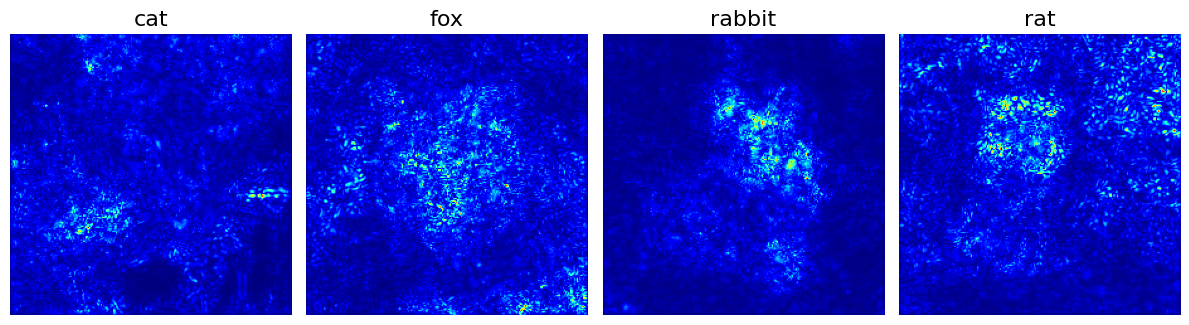

CPU times: user 19.3 s, sys: 4.45 s, total: 23.7 s
Wall time: 16.3 s


In [ ]:
%%time

from tensorflow.keras import backend as K  # Импортируем Keras backend для работы с низкоуровневыми операциями в TensorFlow.
from tf_keras_vis.saliency import Saliency  # Импортируем класс Saliency из библиотеки tf-keras-vis для создания карты внимания.

# Создаем объект внимания с использованием модели, модификатора и флага clone, который гарантирует, что мы не будем изменять оригинальную модель.
saliency = Saliency(model,
                    model_modifier=replace2linear,  # Модифицируем модель, заменяя последний слой на линейную активацию.
                    clone=True)  # Указываем, что создаем клон модели, а не работаем с оригиналом.

# Генерируем карту внимания с использованием функции score и подготовленных входных данных X.
saliency_map = saliency(score, X)

# Настроим визуализацию карты внимания.
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))  # Создаем 4 подграфика для вывода карт внимания.
for i, title in enumerate(image_titles):  # Для каждого изображения из списка image_titles:
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждого подграфика.
    ax[i].imshow(saliency_map[i], cmap='jet')  # Отображаем соответствующую карту внимания с использованием цветовой карты 'jet'.
    ax[i].axis('off')  # Убираем оси вокруг изображения.
plt.tight_layout()  # Обеспечиваем плотное расположение подграфиков без наложения.
plt.show()  # Отображаем финальный результат.


## 7. Визуализация карты внимания с сглаживанием:

Этот блок использует функцию Saliency с параметрами сглаживания, чтобы уменьшить шум на карте внимания и улучшить визуализацию.

Функция Saliency — это метод визуализации, который позволяет анализировать, какие части изображения важны для принятия решения моделью.

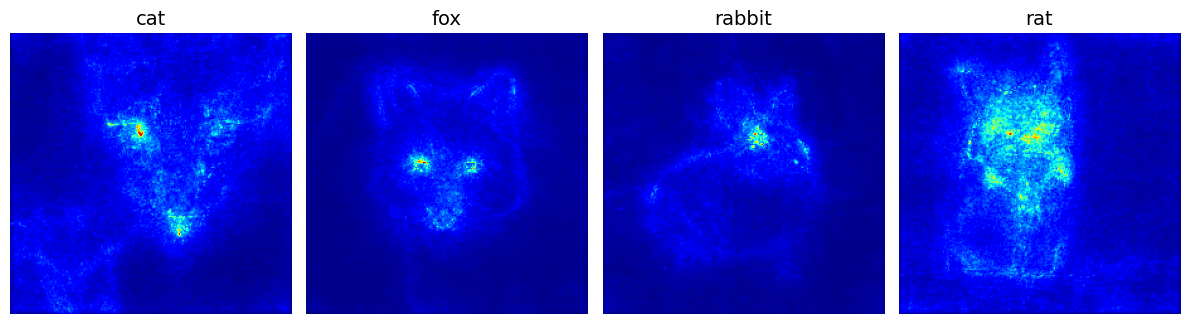

CPU times: user 5min 40s, sys: 13.2 s, total: 5min 54s
Wall time: 3min 45s


In [ ]:
%%time

# Генерируем карту внимания со сглаживанием, которое уменьшает шум за счет добавления шума.
saliency_map = saliency(score,  # Генерация карты внимания с использованием объекта saliency.
                        X,  # Входные данные для модели.
                        smooth_samples=20,  # Количество итераций для расчета градиентов. Чем больше значение, тем менее шумная будет карта.
                        smooth_noise=0.20)  # Уровень шума, который добавляется для сглаживания. Чем выше значение, тем более размытой будет карта.

# Настроим визуализацию карты внимания.
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))  # Создаем 4 подграфика для вывода карт внимания.
for i, title in enumerate(image_titles):  # Для каждого изображения из списка image_titles:
    ax[i].set_title(title, fontsize=14)  # Устанавливаем заголовок для каждого подграфика.
    ax[i].imshow(saliency_map[i], cmap='jet')  # Отображаем соответствующую карту внимания с использованием цветовой карты 'jet'.
    ax[i].axis('off')  # Убираем оси вокруг изображения.
plt.tight_layout()  # Обеспечиваем плотное расположение подграфиков без наложения.
plt.savefig('smoothgrad.png')  # Сохраняем итоговое изображение в файл 'smoothgrad.png'.
plt.show()  # Отображаем финальный результат.


## 8. Визуализация с использованием GradCAM:

В этом блоке используется метод GradCAM для генерации тепловой карты, которая показывает, какие области изображения наиболее важны для классификации модели.

Метод GradCAM (Gradient-weighted Class Activation Mapping) — это метод визуализации, который используется для понимания того, какие части изображения имеют наибольшее влияние на решение модели. GradCAM позволяет выделить области, которые наиболее важны для принятия решения моделью, особенно в контексте сверточных нейронных сетей (CNN).

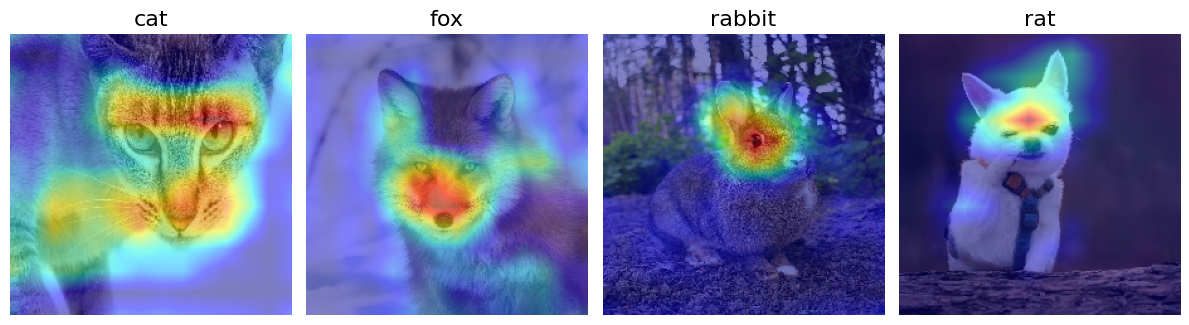

CPU times: user 19.7 s, sys: 1.84 s, total: 21.6 s
Wall time: 13.4 s


In [ ]:
%%time

from matplotlib import cm  # Импортируем цветовую карту (colormap) из библиотеки matplotlib.
from tf_keras_vis.gradcam import Gradcam  # Импортируем класс Gradcam для визуализации карт внимания с использованием GradCAM.

# Создаем объект визуализации Gradcam, который будет использовать модель и модификатор для вывода карты внимания.
gradcam = Gradcam(model,  # Модель, для которой будем генерировать карты внимания.
                  model_modifier=replace2linear,  # Модификатор для изменения последнего слоя модели на линейную активацию.
                  clone=True)  # Создаем копию модели для безопасного использования без модификации оригинала.

# Генерируем тепловую карту (heatmap) с помощью GradCAM для выбранных классов.
cam = gradcam(score,  # Используем функцию score, чтобы указать классы для которых будет генерироваться внимание.
              X,  # Входные данные для модели.
              penultimate_layer=-1)  # Указываем предпоследний слой модели, с которого будут вычисляться градиенты.

# Настроим визуализацию карт внимания.
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))  # Создаем 4 подграфика для вывода карт внимания.
for i, title in enumerate(image_titles):  # Для каждого изображения из списка image_titles:
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)  # Преобразуем карту тепла в формат, подходящий для визуализации (умножаем на 255 для нормализации).
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждого подграфика.
    ax[i].imshow(images[i])  # Отображаем оригинальное изображение.
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)  # Накладываем тепловую карту с прозрачностью (overlay).
    ax[i].axis('off')  # Убираем оси вокруг изображения.
plt.tight_layout()  # Обеспечиваем плотное расположение подграфиков без наложения.
plt.show()  # Отображаем финальный результат.


## 9. Визуализация с использованием GradCAM++:

Здесь используется улучшенная версия GradCAM, называемая GradCAM++, для создания тепловых карт, которые могут давать более точные визуализации внимания модели.

GradCAM++ (Gradient-weighted Class Activation Mapping Plus Plus) — это усовершенствованная версия метода GradCAM, разработанная для улучшения качества визуализации и точности при анализе, какие части изображения влияют на предсказание модели. Основная цель GradCAM++ заключается в улучшении способности метода выделять более точные и высококонтрастные регионы изображения, которые наиболее значимы для классификации.

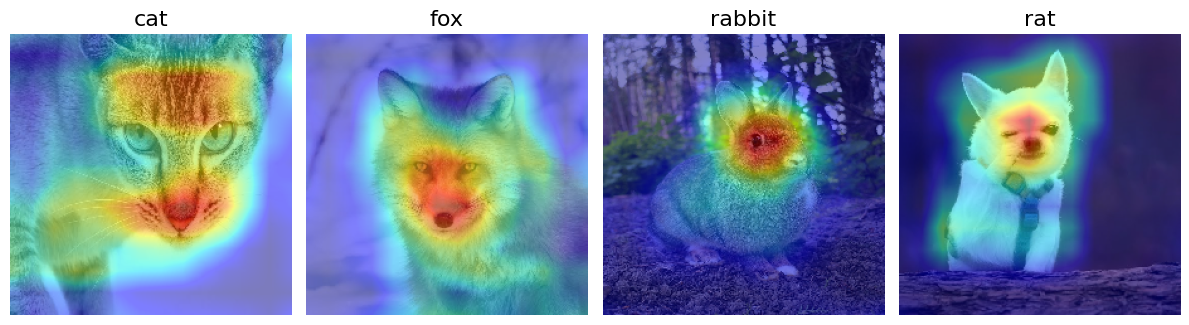

CPU times: user 20 s, sys: 3.29 s, total: 23.3 s
Wall time: 15.1 s


In [ ]:
%%time

from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus  # Импортируем класс GradcamPlusPlus для визуализации карт внимания с использованием GradCAM++.

# Создаем объект визуализации GradCAM++ для нашей модели. Это улучшенная версия GradCAM.
gradcam = GradcamPlusPlus(model,  # Модель, для которой будем генерировать карты внимания.
                          model_modifier=replace2linear,  # Модификатор для изменения последнего слоя модели на линейную активацию.
                          clone=True)  # Создаем копию модели, чтобы не изменить оригинальную модель.

# Генерируем тепловую карту (heatmap) с помощью GradCAM++ для выбранных классов.
cam = gradcam(score,  # Используем функцию score для указания классов, для которых будет генерироваться внимание.
              X,  # Входные данные для модели.
              penultimate_layer=-1)  # Указываем предпоследний слой модели, с которого будут вычисляться градиенты.

# Настроим визуализацию карт внимания.
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))  # Создаем 4 подграфика для вывода карт внимания.
for i, title in enumerate(image_titles):  # Для каждого изображения из списка image_titles:
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)  # Преобразуем карту тепла в формат, подходящий для визуализации (умножаем на 255 для нормализации).
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждого подграфика.
    ax[i].imshow(images[i])  # Отображаем оригинальное изображение.
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)  # Накладываем тепловую карту с прозрачностью (overlay).
    ax[i].axis('off')  # Убираем оси вокруг изображения.
plt.tight_layout()  # Обеспечиваем плотное расположение подграфиков без наложения.
plt.savefig('gradcam_plus_plus.png')  # Сохраняем результат визуализации в файл.
plt.show()  # Отображаем финальный результат.


**Вывод:**

Код демонстрирует использование различных методов визуализации внимания модели VGG16 с помощью библиотеки tf-keras-vis. Включены такие методы, как Saliency, GradCAM и GradCAM++, которые позволяют исследовать, какие части изображений оказывают наибольшее влияние на предсказания модели. Эти методы могут быть полезны для объяснения работы модели и повышения прозрачности нейронных сетей.